# Regressão 01 - tarefa 02 - transformações em X e Y

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [4]:
reg = smf.ols('tip ~ tip_pct*net_bill',data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.091e+31
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:45:18   Log-Likelihood:                 7838.8
No. Observations:                 244   AIC:                        -1.567e+04
Df Residuals:                     240   BIC:                        -1.566e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.829e-16   5.31e-16     -1.098      0.273   -1.63e-15    4.63e-16
tip_pct           2.442e-15   1.33e-15      1.841      0.067    -1.7e-16    5.06e-15
net_bill          1.856e-16    3.2e-17      5.792      0.000    1.22e-16    2.49e-16
tip_pct:net_bill     1.0000   1.83e-16   5.47e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       59.340   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.950
Skew:                          -1.338   Prob(JB):                     1.98e-22
Kurtosis:                       4.633   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [16]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [17]:
reg2 = smf.ols('tip_pct ~ np.log(net_bill)',data=tips).fit()

In [18]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.62e-13
Time:                        18:52:15   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

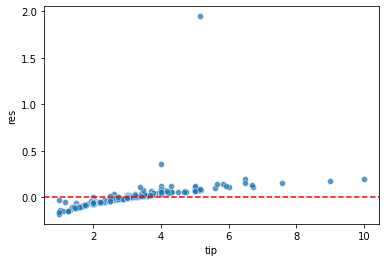

In [19]:
tips['res'] = reg2.resid

sns.scatterplot(x='tip',y='res',data=tips,alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.06e-09
Time:                        18:57:24   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

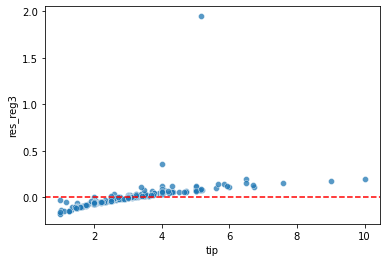

In [21]:
reg3 = smf.ols('tip_pct ~ net_bill+np.power(net_bill,2)',data=tips).fit()
print(reg3.summary())

tips['res_reg3'] = reg2.resid

sns.scatterplot(x='tip',y='res_reg3',data=tips,alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           8.27e-16
Time:                        19:00:50   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

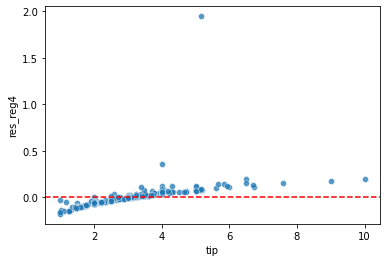

In [24]:
reg4 = smf.ols('np.log(tip_pct) ~ net_bill',data=tips).fit()
print(reg4.summary())

tips['res_reg4'] = reg2.resid

sns.scatterplot(x='tip',y='res_reg4',data=tips,alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

In [27]:
tips['pred_tip_pct'] = np.exp(reg4.fittedvalues)
tips[['pred_tip_pct','tip_pct']].corr().iloc[0,1]**2

0.11440988592529767

###  5. qual modelo resultou no melhor ajuste?

modelo 2